In [1]:
import pandas as pd
import numpy as np
import io
import glob
import os
print(os.listdir("../Capstone"))

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


['.ipynb_checkpoints', 'automotivemodeltest.h5', 'Cap', 'Cap.ipynb', 'CapFinal-Copy1.ipynb', 'CapFinal.ipynb', 'ft']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


In [3]:
#We have 43 different image FOLDERS with 43 different CSV files
#Let's build one complete dataframe here to work with

data = []

path = '../Capstone/ft/Images' #read our path
all_files = glob.glob(path + '/**/*.csv') #read from the csv files in the image folder

for new in all_files:
    dfnew = pd.read_csv(new, sep=';', index_col=None, header=0) #read and organize our csv's
    dfnew['filename'] = os.path.dirname(new) #example: we're adding '../Capstone/ft/Images/00028'
    data.append(dfnew)
    
frame = pd.concat(data, axis=0, ignore_index=True) #concat list into dataframe
frame['name'] = frame['filename'] + '/' + frame['Filename'] #merge file name w/ dirname

df = frame.drop(['Filename', 'filename'], axis=1) #drop what isnt needed here

df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,name
0,29,30,5,6,24,25,0,../Capstone/ft/Images\00000/00000_00000.ppm
1,30,30,5,5,25,25,0,../Capstone/ft/Images\00000/00000_00001.ppm
2,30,30,5,5,25,25,0,../Capstone/ft/Images\00000/00000_00002.ppm
3,31,31,5,5,26,26,0,../Capstone/ft/Images\00000/00000_00003.ppm
4,30,32,5,6,25,26,0,../Capstone/ft/Images\00000/00000_00004.ppm


In [4]:
#How many unique classifiers do we have? Does it match the number of image files?

df.ClassId.nunique()


43

In [5]:
namelist = list(df.name)

print(namelist[:10]) #the output we get are the .ppm files

['../Capstone/ft/Images\\00000/00000_00000.ppm', '../Capstone/ft/Images\\00000/00000_00001.ppm', '../Capstone/ft/Images\\00000/00000_00002.ppm', '../Capstone/ft/Images\\00000/00000_00003.ppm', '../Capstone/ft/Images\\00000/00000_00004.ppm', '../Capstone/ft/Images\\00000/00000_00005.ppm', '../Capstone/ft/Images\\00000/00000_00006.ppm', '../Capstone/ft/Images\\00000/00000_00007.ppm', '../Capstone/ft/Images\\00000/00000_00008.ppm', '../Capstone/ft/Images\\00000/00000_00009.ppm']


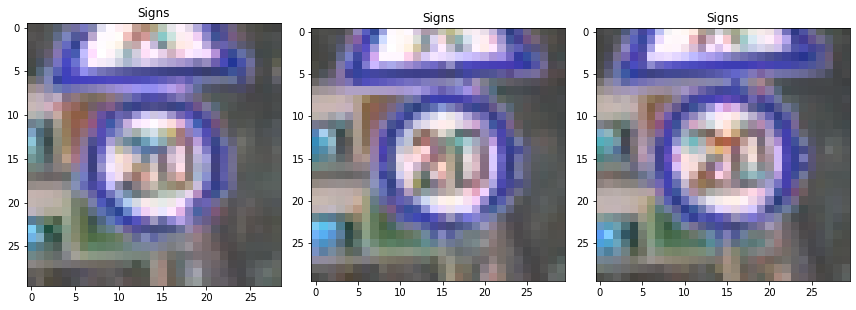

In [6]:
plt.figure(figsize = (12,12)) #sizing

for i in range(3): #show 3 photos
    plt.subplot(1, 3, i+1) #1-3(range) 
    image = cv2.imread(namelist[i]) #cv2 to read image
    plt.imshow(image) #plot
    plt.title('Signs')
    plt.tight_layout()
plt.show()


In [7]:
newdata = []

for image in namelist:
    try:
        img_read = plt.imread(image) #read images
        img_resize = cv2.resize(img_read, (30, 30)) #resize 50x50 all the same shape
        img_array = img_to_array(img_resize) #convert into arrays
        newdata.append(img_array) 
    except:
        None

In [8]:
#Convert to arrays instead of lists

image_data = np.array(newdata)
labels = np.array(list(df.ClassId))


In [10]:
#Time to split data into train / test sets
from sklearn.model_selection import train_test_split


x_train, x_val, y_train1, y_val1 = train_test_split(image_data, labels, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

In [11]:
#One-hot encode target column
y_train = to_categorical(y_train1, 43)
y_val = to_categorical(y_val1, 43)


In [12]:
#Data Shapes

print(x_train.shape) #Image training 
print(x_val.shape) #Image testing

print(y_train.shape) #Label training
print(y_val.shape) #Label Testing

(31367, 30, 30, 3)
(7842, 30, 30, 3)
(31367, 43)
(7842, 43)


In [13]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras.layers import MaxPool2D

from keras import optimizers

In [14]:
#Create model
model = Sequential()
padding="same"
#add model layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))

# model.add(Conv2D(128, kernel_size=3, activation='relu'))
# model.add(Conv2D(128, kernel_size=3, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(rate=0.25))

#Flatten connects convulation layer with our dense layer
model.add(Flatten())
model.add(Dense(43, activation='softmax'))

#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
m = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size = 100, verbose=1)
model.save('automotivemodel.h5')

W0710 19:41:40.451110   616 deprecation.py:323] From c:\users\belal\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0710 19:41:40.883925   616 deprecation_wrapper.py:119] From c:\users\belal\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0710 19:41:40.884922   616 deprecation_wrapper.py:119] From c:\users\belal\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0710 19:41:40.889910   616 deprecation_wrapper.py:119] From c:\users\belal\appdata\local\programs

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 132s 4ms/step - loss: 1.0913 - acc: 0.8461 - val_loss: 0.1247 - val_acc: 0.9684
Epoch 2/20
31367/31367 [==============================] - 130s 4ms/step - loss: 0.0692 - acc: 0.9848 - val_loss: 0.1142 - val_acc: 0.9754
Epoch 3/20
31367/31367 [==============================] - 130s 4ms/step - loss: 0.0462 - acc: 0.9893 - val_loss: 0.0728 - val_acc: 0.9853
Epoch 4/20
31367/31367 [==============================] - 131s 4ms/step - loss: 0.0434 - acc: 0.9905 - val_loss: 0.0966 - val_acc: 0.9837
Epoch 5/20
31367/31367 [==============================] - 125s 4ms/step - loss: 0.0290 - acc: 0.9935 - val_loss: 0.0716 - val_acc: 0.9851
Epoch 6/20
31367/31367 [==============================] - 122s 4ms/step - loss: 0.0226 - acc: 0.9950 - val_loss: 0.0713 - val_acc: 0.9855
Epoch 7/20
31367/31367 [==============================] - 117s 4ms/step - loss: 0.0208 - acc: 0.9949 - val_loss: 0.0596 - v

In [16]:
from keras.models import load_model

model = load_model('automotivemodel.h5')

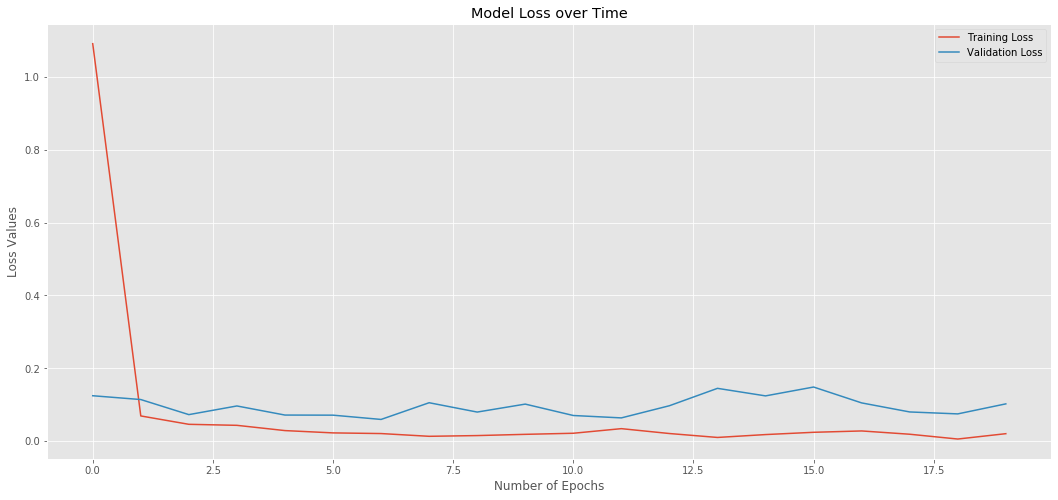

<Figure size 432x288 with 0 Axes>

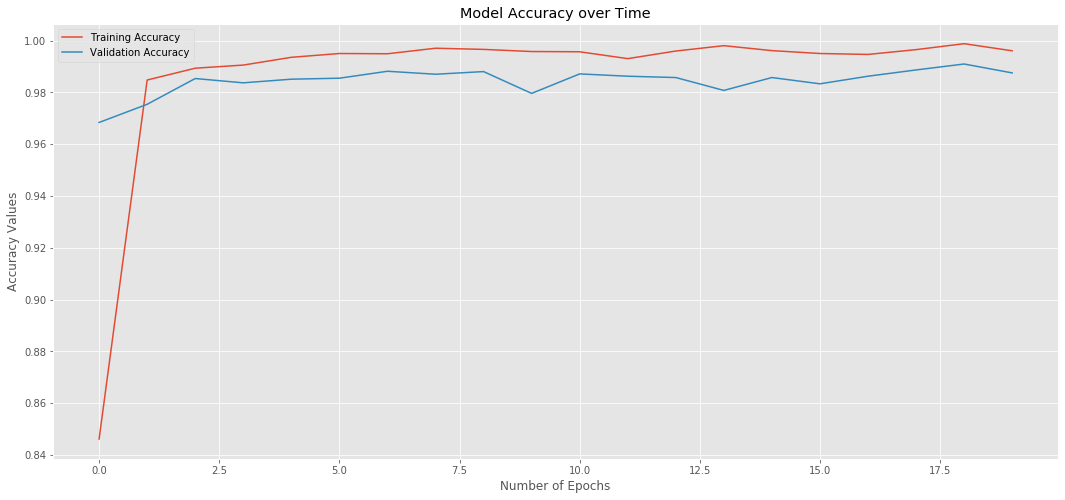

In [17]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize = (18,8))

plt.figure(0)
plt.figure(figsize = (18,8))
plt.plot(range(20), m.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), m.history['val_acc'], label = 'Validation Accuracy')

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Values')
plt.title('Model Accuracy over Time')
plt.legend(loc = 'best')

plt.figure(1)
plt.plot(range(20), m.history['loss'], label = 'Training Loss')
plt.plot(range(20), m.history['val_loss'], label = 'Validation Loss')

plt.xlabel('Number of Epochs')
plt.ylabel('Loss Values')
plt.title('Model Loss over Time')
plt.legend(loc = 'best')

plt.show()

In [18]:
np.mean(m.history['acc'])

0.9871648591983732

In [19]:
print(os.listdir("../Capstone"))

['.ipynb_checkpoints', 'automotivemodel.h5', 'automotivemodeltest.h5', 'Cap', 'Cap.ipynb', 'CapFinal-Copy1.ipynb', 'CapFinal.ipynb', 'ft']


In [20]:
#Predicting with the test data
y_test = pd.read_csv("../Capstone/ft/Test.csv", sep=',', index_col=None, header=0)
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data = []

for f in labels:
    image = plt.imread('../Capstone/ft/test/' + f.replace('Test/', ''))
    size_image = cv2.resize(image, (30,30))
    image_from_array = img_to_array(size_image)
    data.append(np.array(image_from_array))

X_test = np.array(data)
X_test = X_test.astype('float32')*255


In [21]:
#Now let's use our model to predict our test data
#These are all images from a designated test dataset, the model has not seen any of these images in any way

from sklearn.metrics import accuracy_score #accuracy score for classification metric
from sklearn.metrics import classification_report

pred = model.predict_classes(X_test) #plug into our model
accuracy_score(y_test, pred) #actual values vs predctions

0.9577197149643706

### 96% Accurate
We may have had some minor overfitting (training accuracies were 99%) but overall very respectable

### Let's check each classifier

In [22]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        65
           1       0.98      0.97      0.97       725
           2       0.98      0.98      0.98       752
           3       0.96      0.95      0.95       453
           4       0.98      0.96      0.97       670
           5       0.98      0.90      0.94       687
           6       0.78      0.97      0.87       120
           7       0.94      0.97      0.96       437
           8       0.98      0.95      0.97       463
           9       0.99      0.99      0.99       481
          10       0.97      0.99      0.98       649
          11       0.95      0.88      0.91       456
          12       0.97      0.99      0.98       675
          13       0.99      0.99      0.99       726
          14       0.99      1.00      0.99       267
          15       0.99      0.92      0.95       225
          16       0.99      1.00      0.99       148
          17       0.94    

### But how is the model learning?

In [23]:
# Visualizating filters
from keras import backend as K
K.set_learning_phase(1)
import tensorflow as tf


layer_dict = dict([(layer.name, layer) for layer in model.layers])
#print('Layer dict', layer_dict)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 43)                2201643   
Total para

W0710 20:25:58.844886   616 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


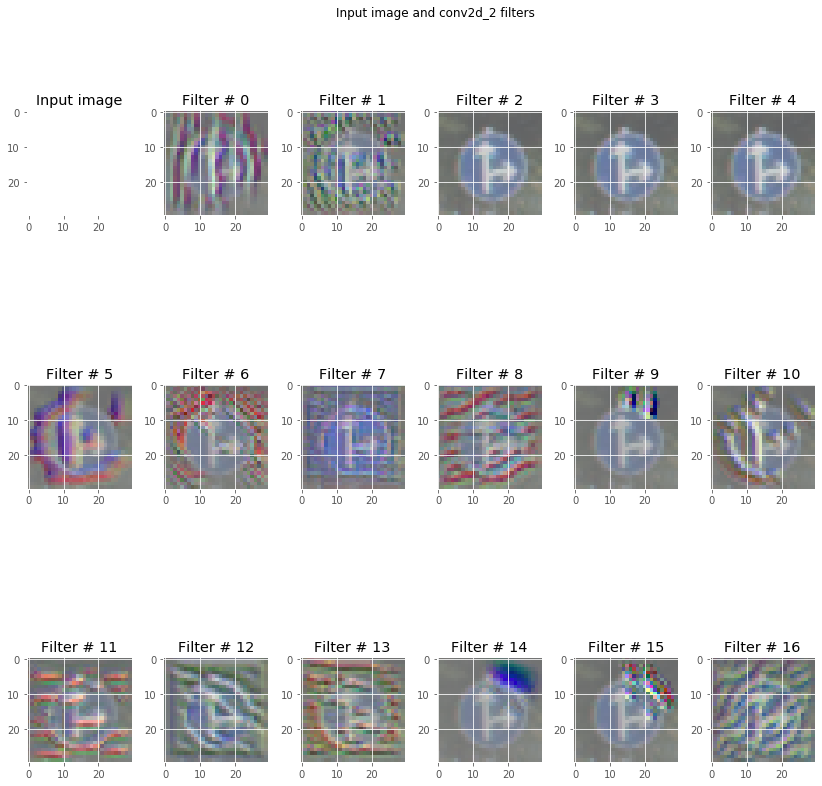

In [24]:

# util function to convert a tensor into a valid image
from keras.layers import Input, Conv2DTranspose

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
#     x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(x_train[0]).reshape((1, 30, 30, 3)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((30, 30, 3)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 3, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 3, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((30, 30, 3)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.1, rect = [0, 0, 0.95, 0.95])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('Filter # %d' % (x * plot_y + y - 1))

vis_img_in_filter()

In [25]:
"""Utilities to compute SaliencyMasks."""
import numpy as np
import keras.backend as K

class SaliencyMask(object):
    """Base class for saliency masks. Alone, this class doesn't do anything."""
    def __init__(self, model, output_index=0):
        """Constructs a SaliencyMask.
        Args:
            model: the keras model used to make prediction
            output_index: the index of the node in the last layer to take derivative on
        """
        pass

    def get_mask(self, input_image):
        """Returns an unsmoothed mask.
        Args:
            input_image: input image with shape (H, W, 3).
        """
        pass

    def get_smoothed_mask(self, input_image, stdev_spread=.2, nsamples=50):
        """Returns a mask that is smoothed with the SmoothGrad method.
        Args:
            input_image: input image with shape (H, W, 3).
        """
        stdev = stdev_spread * (np.max(input_image) - np.min(input_image))

        total_gradients = np.zeros_like(input_image)
        for i in range(nsamples):
            noise = np.random.normal(0, stdev, input_image.shape)
            x_value_plus_noise = input_image + noise

            total_gradients += self.get_mask(x_value_plus_noise)

        return total_gradients / nsamples

class GradientSaliency(SaliencyMask):
    """A SaliencyMask class that computes saliency masks with a gradient."""

    def __init__(self, model, output_index=0):
        # Define the function to compute the gradient
        input_tensors = [model.input,        # placeholder for input image tensor
                         K.learning_phase(), # placeholder for mode (train or test) tense
                        ]
        gradients = model.optimizer.get_gradients(model.output[0][output_index], model.input)
        self.compute_gradients = K.function(inputs=input_tensors, outputs=gradients)

    def get_mask(self, input_image):
        """Returns a vanilla gradient mask.
        Args:
            input_image: input image with shape (H, W, 3).
        """
        
        # Execute the function to compute the gradient
        x_value = np.expand_dims(input_image, axis=0)
        gradients = self.compute_gradients([x_value])[0][0]

        return gradients

In [27]:
#Function to read our images
def show_image(image, grayscale = True, ax=None, title=''):
    if ax is None:
        plt.figure()
    plt.axis('off')
    
    if len(image.shape) == 2 or grayscale == True:
        if len(image.shape) == 3:
            image = np.sum(np.abs(image), axis=2)
            
        vmax = np.percentile(image, 99)
        vmin = np.min(image)

        plt.imshow(image, cmap=plt.cm.plasma, vmin=vmin, vmax=vmax, interpolation='bilinear')
        plt.title(title)
    else:
        image = image + 127.5
        image = image.astype('uint8')
        
        plt.imshow(image)
        plt.title(title)
    
def load_image(file_path):
    im = PIL.Image.open(file_path)
    im = np.asarray(im)
    
    return im - 127.5

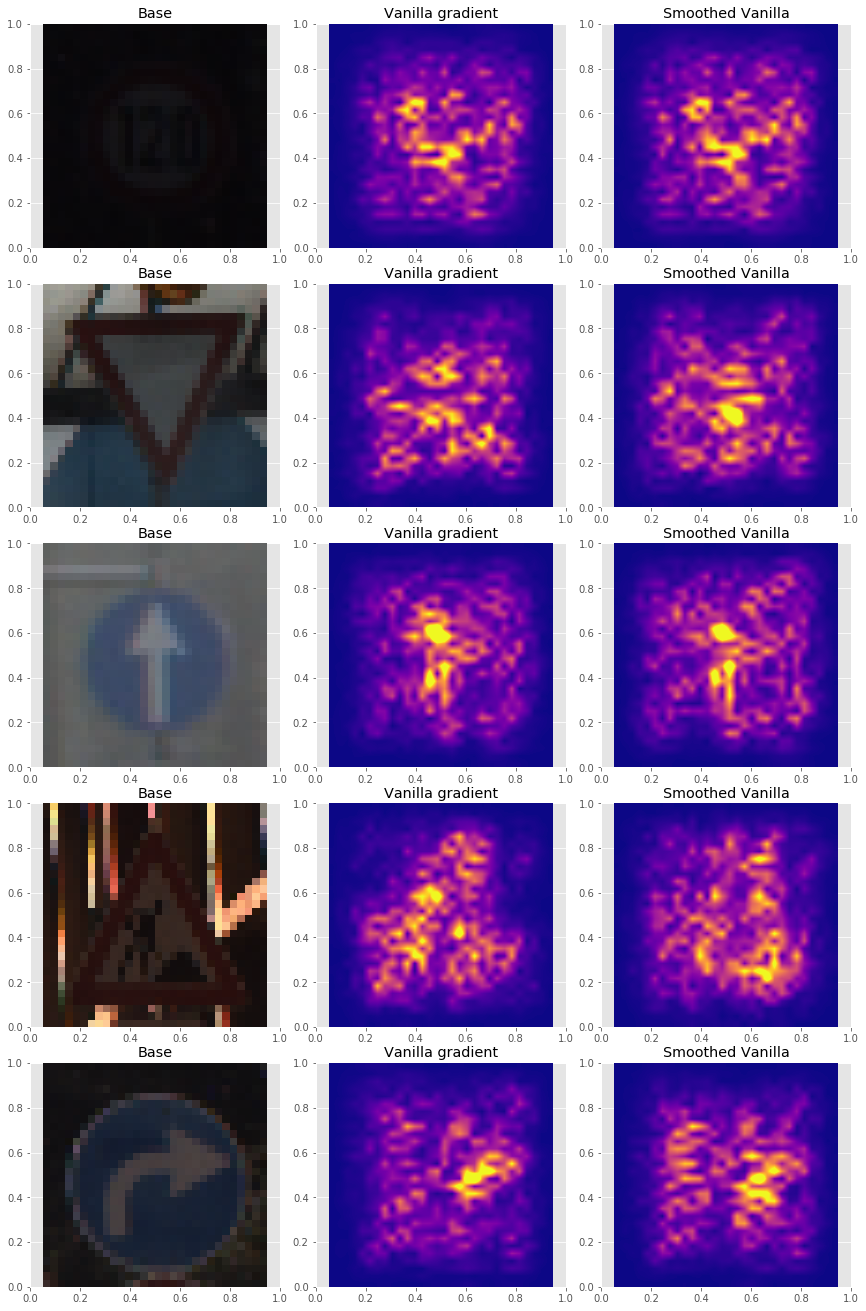

In [67]:
fig, ax = plt.subplots(5, 3, figsize = (12, 18))
fig.tight_layout(pad=0.6, w_pad=0.5, h_pad=1.5)

z = 0
for j in range(50,55):
    img = (x_train[j]) +127.5
    img1 = (x_train[j]) /31.875
    vanilla = GradientSaliency(model, y_train1[j])
    mask = vanilla.get_mask(img1)
    smooth_mask = vanilla.get_smoothed_mask(img1)

#   Plot versions
    show_image(img, grayscale = False, ax=fig.add_subplot(5, 3, z + 1), title="Base")
    show_image(mask, grayscale = True, ax=fig.add_subplot(5, 3, z + 2), title='Vanilla gradient')
    show_image(smooth_mask, grayscale = True, ax=fig.add_subplot(5, 3, z + 3), title='Smoothed Vanilla')
    
    z += 3
#50,55  300,305, 100,105(Great Arrow)  690,695(3 different 30 MPH signs)  

In [29]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [30]:
pred

array([16,  1, 38, ...,  5,  7, 10], dtype=int64)